Min Train Loss: 3.39332
Avg Train Loss: 5.410425610433347
Min Validation Loss: 4.9372


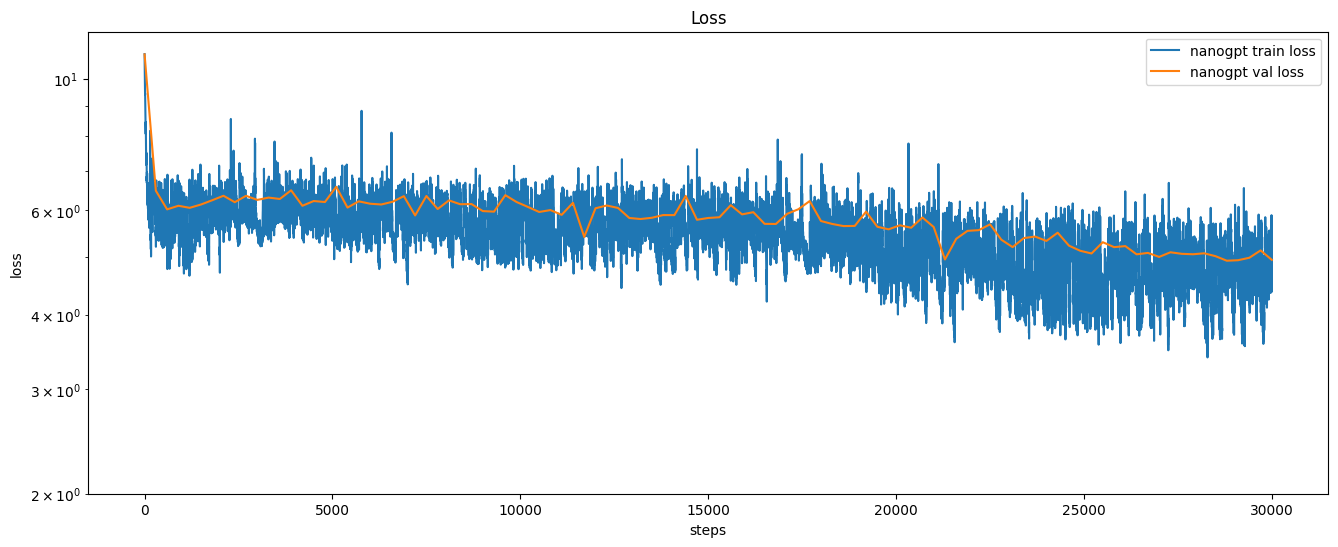

In [15]:
import matplotlib.pyplot as plt
import numpy as np

with open("C:\Workspace-ML\decoder-only-transformer\log_dec11_30000_Steps\log.txt", "r") as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt train loss')
print("Min Train Loss:", min(ys))
print("Avg Train Loss:", sum(ys)/len(ys))
xs, ys = streams_xy["val"] # validation loss
# print(ys)
plt.plot(xs, ys, label=f'nanogpt val loss')
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=12.0, bottom=2.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))


# Min Train Loss: 2.84027
# Avg Train Loss: 4.551221621899975
# Min Validation Loss: 4.0333

# Min Train Loss: 3.39332
# Avg Train Loss: 5.410425610433347
# Min Validation Loss: 4.9372

Text(0.5, 1.0, 'Learning Rate')

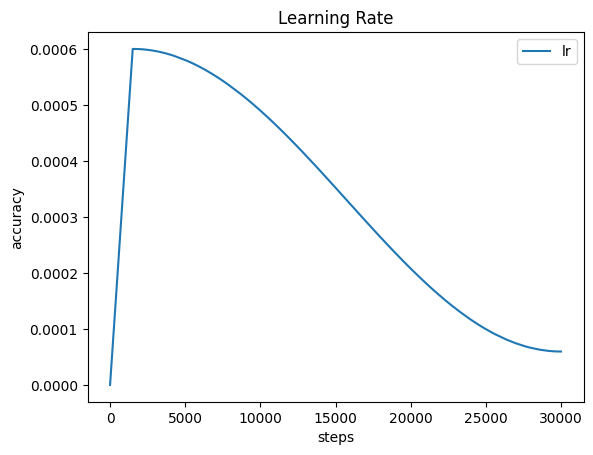

In [14]:

# Panel 2: HellaSwag eval
# plt.subplot(122)
xs, ys = streams_xy["lr"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
# horizontal line at GPT-2 baseline
# if hella2_baseline:
#     plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
# if hella3_baseline:
#     plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("Learning Rate")
# print("Max Hellaswag eval:", max(ys))